# ARIMA

* ### ARIMA (AutoRegression Integrated Moving Average model)
  * AR (AutoRegression) : 관측값과 이전 관측값의 관계를 이용하여 계산
  *  i (Integrated) : 관측값과 직전 관측값의 차이를 이용하여 stationary data로 변형
  *  MA (Moving Average) : 관측값과 이전 관측값의 이동평균의 관계를 이용

* ### 단점 : Seasonal data를 해석할 수 없음

* ### SARIMA (Seasonal ARIMA)
  *  ARIMA 방법으로 처리할 수 없는 seasonal data를 다룰 수 있도록 개선

# TimeSeries with Decomposition

* ### Components of TimeSeries data
  * Level : The baseline value in the series
  * Trend : The increasing or decreasing value in the series
  * Seasonality : The repeating short-term cycle in the series
  * Noise : Random variation in the series

* ### Types of TimeSeries
  * #### Additive model : Linear model
  * y(t) = Level + Trend + Seasonality + Noise
  * Trend : straight line
  * Seasonality : same frequency and amplitude
  
  * #### Multiplicative model : Non-Linear model
  * y(t) = Level * Trend * Seasonality * Noise
  * Trend : curved line
  * Seasonality : increasing or decreasing frequency and/or amplitude

* ### Decomposition은 시계열 데이터 문제를 보다 잘 이해하기 위한 과정

### 모듈 임포트
  * 필요한 모듈을 임포트합니다

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [7]:
# 경고 무시
warnings.filterwarnings('ignore')

# jupyter에서 matplotlib 사용 시 선언
%matplotlib inline

### 데이터 로드
  * 샴페인 판매량 데이터를 로드합니다

In [78]:
original_data_df = pd.read_csv('Champagne_Sales.csv', header = 0, parse_dates = [0], index_col = 0, squeeze = True)

### Train, Sest  데이터 분류
  * 학습에 사용할 데이터와 평가에 사용할 데이터를 분리합니다

In [81]:
train_data_df = original_data_df[:85]
test_data_df = original_data_df[85:]

In [82]:
train_data_df.shape, test_data_df.shape

((85,), (20,))

### 데이터 시각화
  * 분리한 데이터를 시각화해봅니다

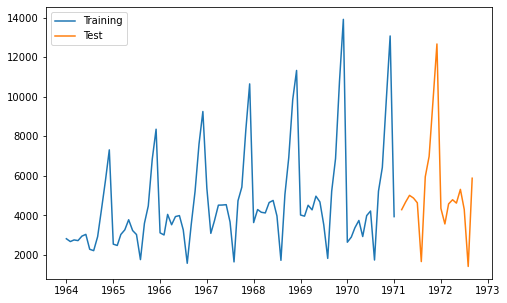

In [33]:
plt.figure(figsize = (8, 5))
plt.plot(train_data_df, label = 'Training')
plt.plot(test_data_df, label = 'Test')
plt.legend(loc = 'upper left')
plt.show()

In [36]:
print(train_data_df.head())

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
Name: Champagne sales, dtype: int64


### Train data 분석
 * Decomposition, Stationaary 확인
 * Decomposition 진행에 필요한 모듈을 임포트하고 결과를 시각화합니다
 * 시각화 결과는 Trend, Seasonal, Resid로 분류됩니다
 * Trend는 상승, 감소 형태를 나타내며, Seasonal은 주기성을 나타냅니다
 * Resid는 그래프가 분리되면서 추출된 일련의 가중치를 의미

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

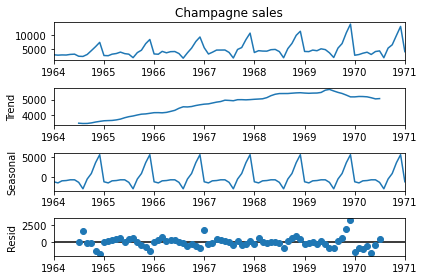

In [83]:
# decomposition 확인 (trend, seasonal, resid)
result = seasonal_decompose(train_data_df, model = 'additive')
re_plot = result.plot()
pyplot.show()

### Stationary 확인
  * Pandas DataFrame type의 데이터를 Numpy array type의 데이터로 변경합니다
  * adfuller() 함수를 이용해 ADF Statistic을 확인합니다
  * 0.05를 기준으로 p-value를 통해 stationary를 확인합니다

In [84]:
# stationary 확인
x = train_data_df.values
result = adfuller(x)
print("ADF Statistic: {:.6f}".format(result[0]))
print("p-value: {:.6f}".format(result[1], end = ''))

if result[1] <= 0.05:
    print(" => Stationary Data")
else:
    print(" => Non-Stationary Data")

ADF Statistic: -2.201104
p-value: 0.205845
 => Non-Stationary Data


### ARIMA 기법의 p, d, q 차수 결정
  * d : Defferencing의 차수
  
  * #### 데이터가 Stationary인 경우
  * d = 0
  * #### 데이터가 Non_stationary인 경우
  * Differencing(차분)하여 Stationary Data로 변환
  * 연속적인 관측값에 대해 차이를 계산합니다

### Stationary Data 변환
  * Differencing 진행 및 시각화합니다
  * Stationary를 확인합니다

In [47]:
import numpy as np

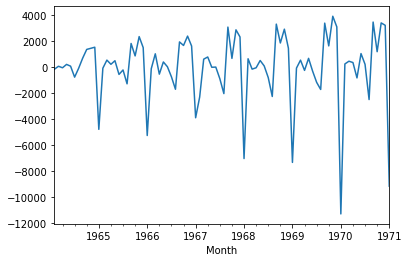

mean: 13.321429 | std: 2619.707813


In [85]:
# differencing 후 Stationary Data 변경
diff_1 = train_data_df.diff(periods = 1).iloc[1:]
diff_1.plot()
plt.show()
print("mean: {:.6f} | std: {:.6f}".format(np.mean(diff_1), np.std(diff_1)))

### Stationary 확인
  * Pandas DataFrame type의 데이터를 Numpy array type의 데이터로 변경합니다
  * adfuller() 함수를 이용해 ADF Statistic을 확인합니다
  * 0.05를 기준으로 p-value를 통해 stationary를 확인합니다

In [57]:
# Stationary 확인
x = diff_1
result = adfuller(x)
print("ADF Statistic: {:.6f}".format(result[0]))
print("p-value: {:.6f}".format(result[1], end = ''))

if result[1] <= 0.05:
    print(" => Stationary Data")
else:
    print(" => Non-Stationary Data")

ADF Statistic: -23.879554
p-value: 0.000000
 => Stationary Data


### Stationary Data 확인
 * Decomposition, Stationaary 확인
 * Decomposition 진행에 필요한 모듈을 임포트하고 결과를 시각화합니다

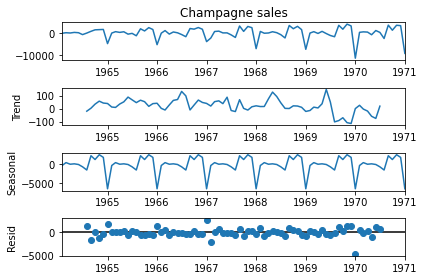

In [58]:
result = seasonal_decompose(diff_1, model = 'additive')
ret_plot = result.plot()
pyplot.show()

### ARIMA 차수 선정
* ACF로 MA 유의 차수 q 확인  
* PACF로 AR 유의 차수 p 확인
* Differencing(차분) 차수 d는 앞에서 결정
* 이 예에서는 p = 2 or 4, d = 1, q = 0 or 2 or 4

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

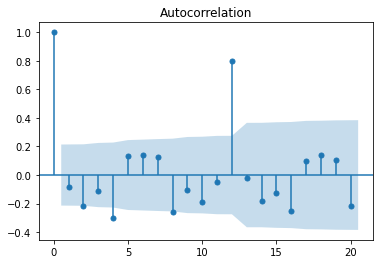

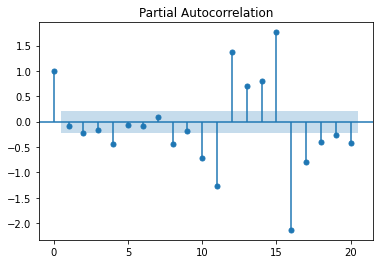

In [60]:
# ACF
plot_acf(diff_1)

# PACF
plot_pacf(diff_1)
pyplot.show()

### ARIMA(2, 1, 0) 경우
* 첫번째 coef.의 p-value > 0.05라서 좋은 예측 성능을 기대할 수 없습니다

In [66]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')

### 모델 확인
  * ARIMA() 함수를 이용해 model을 생성합니다
  * .fit() 함수를 이용해 학습을 진행합니다
  * summary() 함수를 이용해 모델의 parameters를 확인합니다

In [67]:
model = ARIMA(train_data_df, order = (2, 1, 0))
model_fit = model.fit(trend = 'nc', full_output = True, disp = 1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.Champagne sales   No. Observations:                   84
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -777.624
Method:                       css-mle   S.D. of innovations           2534.282
Date:                Sat, 26 Sep 2020   AIC                           1561.249
Time:                        09:14:36   BIC                           1568.541
Sample:                    02-01-1964   HQIC                          1564.180
                         - 01-01-1971                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ar.L1.D.Champagne sales    -0.1026      0.114     -0.902      0.367      -0.325       0.120
ar.L2.D.Champagne sales    -0.2530      0.114     -2.226      0.026      -0.476      -0.030


### 데이터 시각화
  * 파란색 라인이 train data, 주황색 라인이 test data, 초록색 라인이 predicted data입니다
  * 초록색 라인을 보고 알 수 있다시피, seaonality를 전혀 반영하지 못 했기 때문에 결과값이 좋지 않습니다

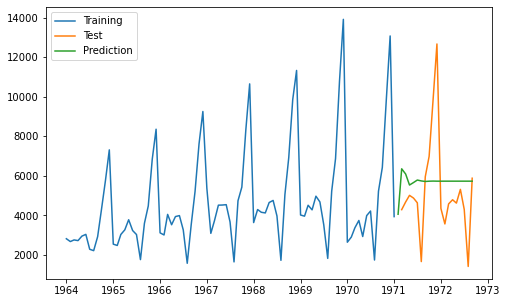

In [65]:
prediction = model_fit.predict(start = '1971-02', end = '1972-09', typ = 'levels')

plt.figure(figsize = (8, 5))
plt.plot(train_data_df, label = 'Training')
plt.plot(test_data_df, label = 'Test')
plt.plot(prediction, label = 'Prediction')
plt.legend(loc = 'upper left')
plt.show()

### 오차 확인

In [69]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

In [75]:
# evaluate forecasts
rmse = sqrt(mse(test_data_df, prediction[:19]))
print("RMSE: {:.3f}".format(rmse))

RMSE: 2515.441


### 검증
##### R2 Score

In [76]:
from sklearn.metrics import r2_score

In [77]:
r2_score_ret = r2_score(test_data_df, prediction[:19])
print("R2 Score: {:.6f}".format(r2_score_ret))

R2 Score: -0.043698
